# Porto Seguro's Safe Driver Prediction

- 데이터: [Porto Seguro's Safe Driver Prediction](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data)
- 필사 참조: [Data Preparation & Exploration](https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook)

## Introduction

1. Visual inspection of your data
2. Defining the metatdata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

## Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

## Loading data

In [2]:
train = pd.read_csv('../data/Porto_Seguro/train.csv')
test = pd.read_csv('../data/Porto_Seguro/test.csv')

## Data at first sight
- Features that belong to **similar groupings are tagged** as such in the feature names (e.g. `ind`, `reg`, `car`, `calc`)
- Feature names include the postfix `bin` to indicate binary features and `cat` to indicate categorical features.
- Features **without these designations are either continous or ordinal.**
- Values of **-1** indicate that the feature was **missing** from the observation.
- The **target** columns signifies whether or not a claim was filed for that policy holder.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
len(train.columns)

59

In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


We indeed see the following
- binary variables
- categorical variables of which the category values are integers
- other variables with integer or float values
- variables with -1 representing missing values
- the target variable and an ID variable

In [6]:
train.shape

(595212, 59)

- 595,212 rows
- 59 columns

> test data에서도 같은 크기를 가지는지 살펴보자.
> - 먼저 train set에 duplicate row가 있는지 확인해보기

In [7]:
train.drop_duplicates() # 없음
train.shape

(595212, 59)

In [8]:
test.shape

(892816, 58)

test data에는 variable 하나가 적은데, 이는 `target variable`일 것이다.
- 각 type에 얼마나 많은 variable이 있는지 확인해보기


- 후에 categorical variable에 대해서는 dummy variable을 생성해야 하는데 bin(binary) variable는 이미 binary이므로 필요하지 않다.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
print(train.isnull().sum().sum(), test.isnull().sum().sum())

0 0


- 이 데이터에서는 nan 값이 -1이기 때문에 info()로 확인해도 non-null 값이 있지 않다.

## Metadata
- variable에 대해서 meta-information을 저장할 것이다.
- 이는 우리가 analysis, visualization, modeling, ... 할 때 특정 variables를 뽑을 때 유용할 것이다.
<br/>

- **role**: input, ID, target
    - target, ID 제외 모두 'input'
- **level**: nominal, interval, ordinal, binary
    - binary: 'bin'이 들어가거나 target이면
    - nominal: categorical 변수. 순서 없음
        - 'cat'이 들어가거나 id면
    - interval: 연속된 구간
        - dtype이 flaot면
    - ordinal: categorical 변수. 순서 있음
        - dtype이 int면
- **keep**: True or False
    - 'id'는 False고 나머지는 다 True
- **dtype**: int, float, str

<br/>

> **🔆 마지막에 dictionary로 만든 뒤 리스트에 넣어 데이터프레임으로 만든게 인상적이었다.**
> - 나였으면 그냥 바로 데이터프레임에 넣거나, 리스트로만 만들어서 넣었을듯!

In [11]:
data = []
for f in train.columns:
    
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # Defining the level
    if ('bin' in f) or (f == 'target'):
        level = 'binary'
    elif ('cat' in f) or (f == 'id'):
        level = 'nominal' # categorical. 순서 없음
    elif train[f].dtype == float:
        level = 'interval' # 연속된 측정 구간 사이 간격이 동일한 경우
    elif train[f].dtype == int:
        level = 'ordinal' # categorical. 순서 있음
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variables
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


- Example to extract all `nominal` variables that are not dropped.

In [13]:
meta[(meta.level == "nominal") & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

- `role`과 `level`로 groupby해서 보여주기

In [14]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [15]:
# 위 코드 해석1
meta.groupby(['role', 'level'])['role'].size()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
Name: role, dtype: int64

In [16]:
# 위 코드 해석2
{'count': meta.groupby(['role', 'level'])['role'].size()}

{'count': role    level   
 id      nominal      1
 input   binary      17
         interval    10
         nominal     14
         ordinal     16
 target  binary       1
 Name: role, dtype: int64}

In [17]:
# 위 코드 해석3
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()})

count
role   level          
id     nominal       1
input  binary       17
       interval     10
       nominal      14
       ordinal      16
target binary        1

In [18]:
# 위 코드 해석4
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

- `describe` 메소드는 데이터프레임에 적용할 순 있지만 범주형 변수와 id에 대해 평균, 표준편차, ... 등을 계산하는데 올바르지 않다.
- 범주형 변수에 대한 접근은 나중에 해보자.
- `metatdata`를 만든 덕분에 우리가 원하는 데이터들만 뽑아서 계산할 수 있다.

### Interval variables
- 연속된 측정 구간 사이 간격이 동일한 경우

In [19]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [20]:
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


#### - reg variables
- only `ps_reg_03` has missing values; min=-1을 보고 알 수 있음
- min to max의 범위가 변수마다 다르다. -> StandardScaler를 통해 스케일링을 하자.


#### - car variables
- `ps_car12`, `ps_car_14` has missing values
- 마찬가지로 scaling 하자.


#### - calc variables
- no missing values
- maximum이 0.9이다.
- 3개의 _calc 변수는 모두 비슷한 분포를 가진다.


Overall, 살펴보았을 때 모든 변수의 범위가 생각보다 작다. 이미 transformation (e.g. log)가 적용된 것이 아닐까?


### Ordinal variables
- categorical 변수. 순서 있음

In [21]:
v = meta[(meta.level=="ordinal") & (meta.keep)].index
v

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

In [22]:
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- Only `ps_car_11` has missing value
- 다양한 range에 대해 scaling을 가하자.

### Binary variables

In [23]:
v = meta[(meta.level=="binary") & (meta.keep)].index
v

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object', name='varname')

In [24]:
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ❓ priori in the train data is 3.645%, which is **strongly imbalanced.**
- 대부분의 값들이 0이다.

### Handling imbalanced classes
- 위에서 봤지만 target=1인 데이터들이 target=0인 데이터들보다 훨씬 적었다.
- ❓ `This can lead to a model that has great accuracy but does have any added value in practice`
- 이 문제를 다룰 수 있는 2가지 전략

> - oversampling records with target=1
> - undersampling records with target=0

우리의 training set은 크기가 꽤 크기 때문에, **undersampling**을 진행하자.
- ❓ 아래 식의 `undersampling_rate`을 작성한 식의 의미가 이해가 잘 가지 않는다.

In [25]:
len(train[train.target==0]), len(train[train.target==1])

(573518, 21694)

In [26]:
desired_apriori = 0.10

# Get the indices per target value
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# Get original number or records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1) / (desired_apriori*nb_0)
undersampled_nb_0 = int(undersampling_rate*nb_0)

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1) # undersampling한 비target과 target의 index 합치기

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


> `target=0`의 undersampling 효과: 573518 -> 21694

### Data Quality Checks
#### Checking missing values
- Missings are represented as -1
> - 🔆 평소 보통 `len`만 사용했는데 `count()`도 많이 쓰자.
> - 🔆 `f''`의 `{}` 안에도 point type을 지정할 수 있다.

❓ 아래를 내림차순으로 정렬하면 더 보기 좋지 않을까?

In [27]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count() # missing value 개수 저장
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0] # 비율
        
        print(f'Variable {f} has {missings} records ({missings_perc:.2%}) with missing values')
        
print(f'\nIn total, there are {len(vars_with_missing)} variables with missing values')

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values

In total, there are 12 variables with missing values


- `ps_car_03`, `ps_car_05`: missing value의 큰 비율을 차지 -> 지우자!
- `ps_reg_03`(continous)는 18% -> 평균으로 대체
- ❓ `ps_car_11`(ordinal)은 딱 1개 -> ❓ 최빈값으로 대체
- ❓ `ps_car_12`(continous)은 딱 2개 -> 평균으로 대체
- `ps_car_14`(continuous): 7% -> 평균으로 대체


**🧤 결측치 대체 `SimpleImputer`**
> [출처](https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html#:~:text=%EA%B2%B0%EC%B8%A1%EB%90%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%EC%B2%98%EB%A6%AC,%EB%8C%80%EC%B2%B4(imputation)**%EB%9D%BC%EA%B3%A0%20%ED%95%9C%EB%8B%A4.)
> - 결측치를 대체할 때 해당 열의 비결측 데이터의 평균값 or 중앙값 등을 대체값으로 사용해 결측된 데이터를 채운다.
> - scikit-learn 패키지의 `SimpleImputer` 클래스를 사용하면 쉽게 결측 데이터를 대체할 수 있음

> 1. `SimpleImputer` 클래스 객체를 생성하고, `strategy` 인수를 'mean'으로 두면 평균값, 'median'으로 두면 중앙값, 'most_frequent'로 하면 최빈값을 대체값으로 사용한다.
> 2. `fit_trainsform` 메서드를 사용하면 대체값이 채워진 데이터프레임을 생성한다.
    - 이는 2차원 배열을 입력으로 받으므로 `[[]]`를 사용함
    - 대신 대입할 때 다시 1차원으로 만들어줘야 하기 때문에 `ravel()` 함수로 flatten을 진행해주자.

> - 데이터가 실수 연속값 -> 평균 or 중앙값. 값의 분포가 대칭적이면 평균이 좋고, 심하게 비대칭인 경우 중앙값이 적당하다.
> - 데이터가 범주값이거나 정수값인 경우 최빈값을 사용할 수 있다.

In [28]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel() # 최빈값

#### Checking the cardinality of the categorical variables
- Cardinality는 변수에서 서로 다른 value들의 개수를 알려준다.
- categorical 변수에 대해 dummy variable을 생성할 것이기 때문에, 얼마나 많은 distinct value들이 있는지 확인할 수 있다.
- 이 variable들을 dummy variable의 결과에 따라 다르게 다룰 것이다.

> 🔆 **dummy variable이란?**
> - 범주형 변수를 연속형 변수로(스럽게) 변환하기
    - Why use? 연속형 변수로 만들어야 회귀분석이 가능하다.
> - 아래에서 `value_counts()`로 확인한 결과 `ps_car_11_cat`은 104개의 범주를 가진 범주형 변수이다. 이를 연속형 변수로 만들어주자.

In [29]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0] # 개수
    print(f'Varialbe {f} has {dist_values} distinct values')

Varialbe ps_ind_02_cat has 5 distinct values
Varialbe ps_ind_04_cat has 3 distinct values
Varialbe ps_ind_05_cat has 8 distinct values
Varialbe ps_car_01_cat has 13 distinct values
Varialbe ps_car_02_cat has 3 distinct values
Varialbe ps_car_04_cat has 10 distinct values
Varialbe ps_car_06_cat has 18 distinct values
Varialbe ps_car_07_cat has 3 distinct values
Varialbe ps_car_08_cat has 2 distinct values
Varialbe ps_car_09_cat has 6 distinct values
Varialbe ps_car_10_cat has 3 distinct values
Varialbe ps_car_11_cat has 104 distinct values


In [30]:
train['ps_ind_02_cat'].value_counts()

 1    157124
 2     45273
 3     10310
 4      4130
-1       103
Name: ps_ind_02_cat, dtype: int64

In [31]:
train['ps_ind_02_cat'].value_counts().shape[0]

5

- Only **ps_car_11_cat** 만이 many distinct value를 가진다.
> - ✔️ `assert`: 뒤의 조건이 True가 아니면 AssertError를 발생 시킴
> - 🔆 `name`: 열 이름 (ex. train['ps_car_11_cat'].name -> 'ps_car_11_cat')
> - 🔆 `to_frame()`: 안에 열 이름 삭제 가능 !

In [32]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, # train
                  tst_series=None, # test
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """
    
    assert len(trn_series) == len(target) # 길이 같아야 함
    assert trn_series.name == tst_series.name # 이름 같아야 함
    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    
    # Apply average function to all target data
    prior = target.mean()
    
    # The bigger the count the less full_avg in taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name), # to_frame() 안에 이름 생략 가능
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                                    on=trn_series.name,
                                    how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                                    on = tst_series.name,
                                    how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index os restore it
    ft_tst_series.index = tst_series.index

    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [33]:
# 위 코드 해석 1
t = pd.concat([train['ps_car_11_cat'], train.target], axis=1)
av = t.groupby(by=train['ps_car_11_cat'].name)[train.target.name].agg(['mean', 'count'])
av

,mean,count
ps_car_11_cat,,
1,0.108260,1247
2,0.103082,941
3,0.139078,1172
4,0.164966,588
5,0.113000,4646
...,...,...
100,0.138773,1679
101,0.108035,2601
102,0.097127,731


In [34]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target=train.target,
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False # Updating the meta

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### Exploratory Data Visualization
#### Categorical variables
categorical 변수와 target=1인 손님의 평균 비율을 살펴보자.

<Figure size 432x288 with 0 Axes>

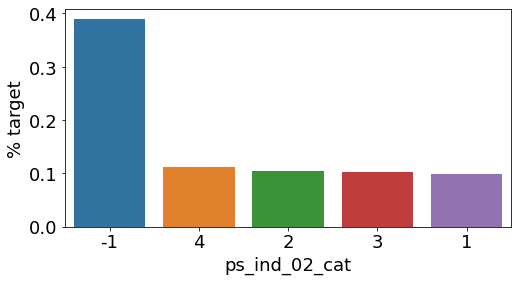

<Figure size 432x288 with 0 Axes>

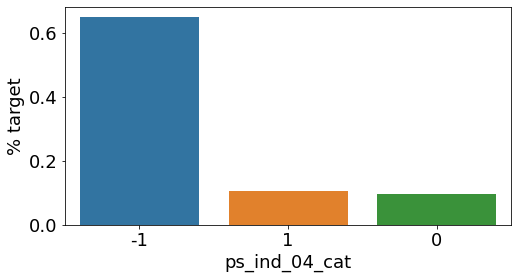

<Figure size 432x288 with 0 Axes>

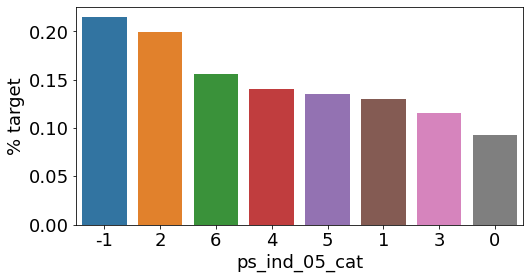

<Figure size 432x288 with 0 Axes>

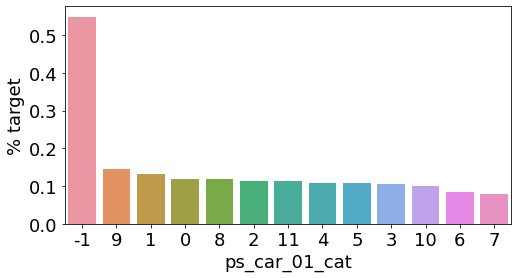

<Figure size 432x288 with 0 Axes>

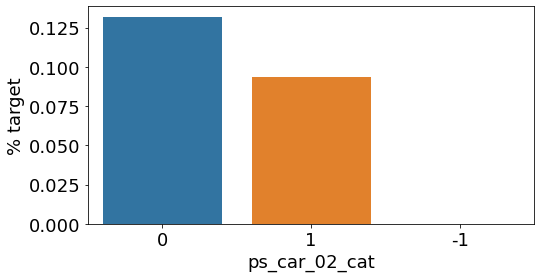

<Figure size 432x288 with 0 Axes>

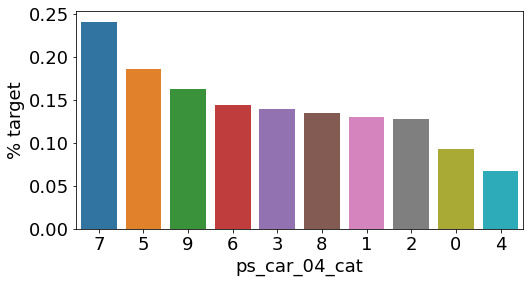

<Figure size 432x288 with 0 Axes>

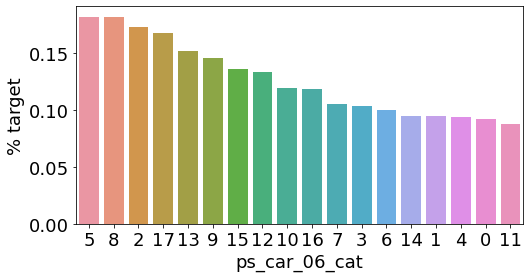

<Figure size 432x288 with 0 Axes>

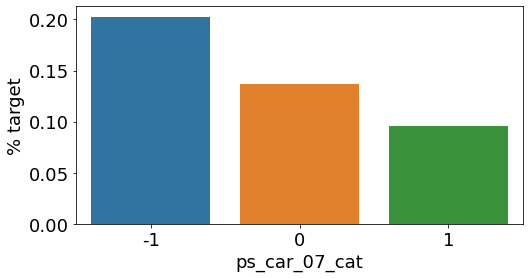

<Figure size 432x288 with 0 Axes>

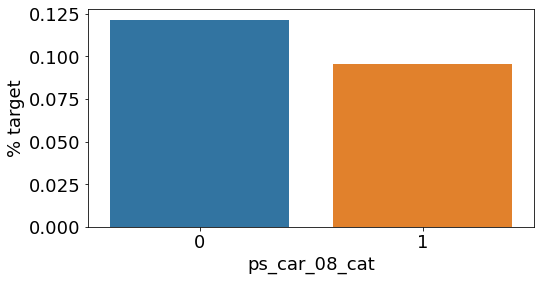

<Figure size 432x288 with 0 Axes>

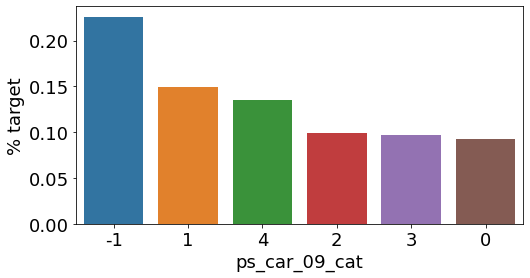

<Figure size 432x288 with 0 Axes>

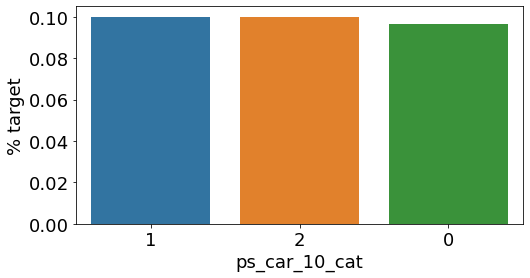

In [35]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

위 그림에서 **missing value**를 확인할 수 있는데, 이 missing value들을 평균이나 mode로 대체하는 것보다 따로 분리된 category value로 두는 것이 좋다. 
- missing value를 가지는 손님들이 insurance claim을 더 요청하는 것을 알 수 있다. (값이 높기 때문에)

#### **Interval variables**
heatmap으로 interval variable 사이의 상관관계를 확인해보자.
- reference: [example by Michael Waskom](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)

> 🔆 sns의 `diverging_palette()` 클래스: 양 끝 값들이 나뉘는 데이터에 대해 커스터마이징한 컬러맵을 만들 수 있다.
> - 음수가 나올 경우 양수와 음수 색을 달리할 수 있다!

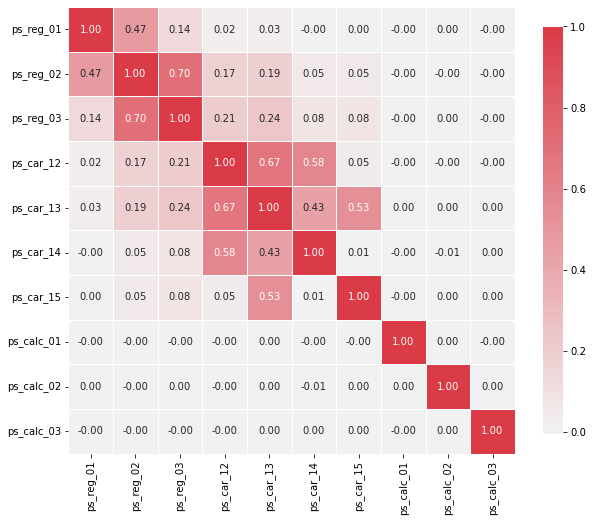

In [36]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})
    plt.show();

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

strong correlations
- ps_reg_02 & ps_reg_03 (0.7)
- ps_car_12 & ps_car_13 (0.67)
- ps_car_12 & ps_car_14 (0.58)
- ps_car_13 & ps_car_15 (0.53)

두 변수 간의 관계를 보기 위해 pairplot을 사용할 수도 있다.
- 하지만 이미 heatmap에서 상관관계가 있는 제한된 변수를 보여주었기 때문에, 높은 상관관계를 가진 변수만 떼어서 보자.

In [37]:
s = train.sample(frac=0.1) # train에서 랜덤으로 0.1만큼만 추출

#### - ps_reg_02 & ps_reg_03
아래 회귀선이 보여주듯, 이 변수들 간에선 linear relationship이 있다. <br/>
*hue* parameter를 사용해 우린 회귀선이 target=0과 target=1에서 같은 값을 가지는 걸 알 수 있다.

> 🔆 `lmplot`: 회귀선 + 플롯

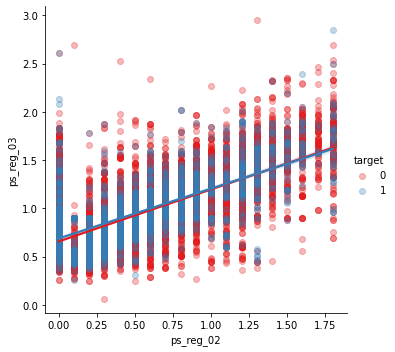

In [38]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### - ps_car_12 & ps_car_13

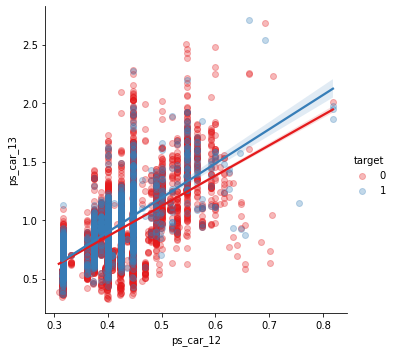

In [39]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### - ps_car_12 & ps_car_14

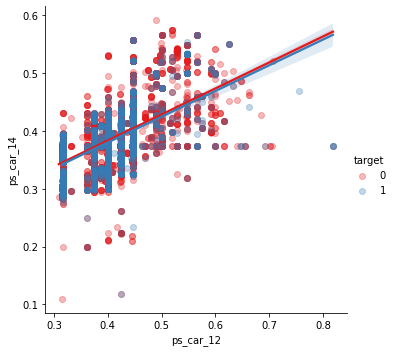

In [40]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

#### - ps_car_13 & ps_car_15

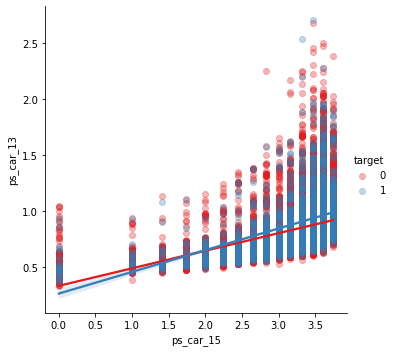

In [41]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha': 0.3})
plt.show()

위와 같이 상관관계가 있는 변수들을 결정했다. 이제 차원을 줄이기 위해 PCA를 행할 수 있다.
- ❓ 여기선 많이 없으므로 heavy-lifting을 하자.

### Checking the correlations between ordinal variables

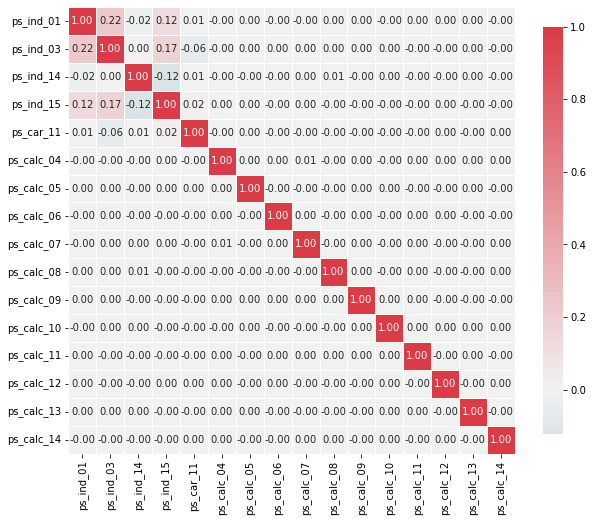

In [42]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

ordinal 변수에 대해선 많은 상관관계를 보지 못했다. <br/>
반면 target value로 group화 시켰을 때 어떤 분포가 나오는지 살펴보자.

## Feature Engineering
### Creating dummy variables
categorical 변수의 값들은 어떤 순서나 양을 나타내지 않는다. (예를 들어, category 2는 category 1의 두 배가 아니다.) <br/>
그러므로 우린 이를 다루기 위해 dummy variable을 만들 수 있는데, 첫 번째 dummy variable은 지운다. <br/>
❓ 그 이유는 이 정보는 original value의 카테고리에서 생성된 다른 dummy variable으로부터 온 정보일 수 있기 때문이다.

In [43]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print(f'Before dummification we have {train.shape[1]} variables in train')

train = pd.get_dummies(train, columns=v, drop_first=True)
print(f'After dummification we have {train.shape[1]} variables in train')

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


- train data에 총 52개의 dummy variable을 생성했다!

### Creating interaction variables

**`PolynomialFeatures(다항회귀)`** <br/>
일반 선형회귀로 나타낼 수 없는 분포는 다항 회귀를 이용한다.
- 데이터들 간의 형태가 비선형일 때 데이터의 **각 특성에 제곱을 추가**해주어 특성이 추가된 비선형 데이터를 선형 회귀 모델로 훈련시키는 방법

> - `PolynomialFeatures`: 현재 데이터를 다항식 형태로 변경. 각 특성의 제곱 or 그 이상을 추가
> - `degree`: 차수 조절
> - `include_bias`: True일 경우 0차항도 함께 만든다.
> - 이렇게 만들어진 다항식 모델에 train[v]를 `fit_transform()`하여 새로운 데이터를 생성한다.

In [44]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False) # 다항식 형태
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) # Remove the original columns

# Concat the interaction variables to the train data
print(f'Before creating interactions we have {train.shape[1]} variables in train')
train = pd.concat([train, interactions], axis=1)
print(f'After creating interactions we have {train.shape[1]} variables in train')

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


- train 데이터에 추가적인 extra interaction을 더했다.

In [45]:
pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v)).head(1)

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.6,0.6,0.838153,0.368782,0.540603,0.345688,2.0,0.9,0.3,0.0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.0,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.0,0.7025,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.0,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.0,0.292252,0.18688,1.081207,0.486543,0.162181,0.0,0.1195,0.691375,0.311119,0.103706,0.0,4.0,1.8,0.6,0.0,0.81,0.27,0.0,0.09,0.0,0.0


In [46]:
interactions.head(1)

,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.0,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.0,0.7025,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.0,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.0,0.292252,0.18688,1.081207,0.486543,0.162181,0.0,0.1195,0.691375,0.311119,0.103706,0.0,4.0,1.8,0.6,0.0,0.81,0.27,0.0,0.09,0.0,0.0


## Feature selection
### Removing features with low or zero variance

❓ `Personally, I prefer to let the classifier algorithm chose wich features to keep.`
- no or very low 분산을 가지는 feature들은 제거하자.
- **VarianceThreshold**: 0분산을 가지는 feature들은 제거한다.
- 하지만 이전 단계에서 봤듯이, 0분산을 가지는 변수들은 없었기에 1%보다 작은 31개의 변수들을 제거하도록 하자.

모델 학습에 있어 X(특성, feature)와 y(정답, target) 데이터셋을 활용할 때 X의 개수가 다양하다는 것은 y를 예측할 힌트가 많아진단 말과 가탇. 하지만 무작정 이 feature의 수가 많다고 좋은 것은 아니다. 많기만한 특성은 모델을 overfitting시킬 수 있다.
- 따라서 어느 정도 scale이 갖춰진다면, 이후부턴 시나리오에 적합한 데이터의 **품질**과의 싸움이 된다.
- 때문에 다양한 특성을 가진 데이터셋을 확보했다면, 그 다음은 가장 유용한 특성을 **선별**(selection)하는 과정이 필요하다.
- 이는 **차원 축소**(Deimensionality Reduction)과는 다른 개념으로, 차원 축소는 새로운 특성 조합을 생성하지만 특성 선택은 값의 특성을 변경하지 않고, 포함 및 제외하는 방법론이다.
> - (+) 주의해야 할 점은, 특성 선택은 **모델 평가 루프 내에 포함**되어야 한다.
> - 특성 선택으로 어떤 데이터셋을 확정짓고, CV를 통해 모델을 평가하면 안 됨.

<br/>

**VarianceThreshold**: 분산에 따른 선별
- [참조](https://junklee.tistory.com/8)
- 예측 모델에서 중요한 특성이란, 타겟과의 상관관계가 큰 특성을 의미한다.
- 어떤 특성의 값 자체가 다양한 표본에 따라 그다지 변하지 않는다면, 예측에 큰 도움이 되지 않을 가능성이 높다.
    - 남성을 대상으로 한 설문조사에서 남성이라는 성별 특성은 무의미 하다.
- 이러한 이유로 표본 변화에 따른 데이터 값의 변화량 즉, **분산이 기준치보다 낮은 특성은 제거하는 것**이 분산에 따른 선별 방법이다.
- but, 분산에 의한 선택은 반드시 상관관계와 일치한다는 보장은 없다.

> - `np.vectorize()`: 0.01보다 큰 분산을 갖는 columns는 True, 작은 분산은 False인데 이를 뒤집어 주기 위해 np.vectorize 함수를 쓴다.
> - `get_support()`: 선택한 columns를 불러온다.

In [47]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x: not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


만약 variance를 기반으로 변수를 선택하면 많은 변수를 잃을 것이다. 하지만 많은 변수를 갖지 않으므로, classifier가 고르게 하자. 더 많은 변수를 가진 데이터셋일수록 진행 시간을 줄일 것이다. <br/>

Sklearn은 다른 [feature selection methods](https://scikit-learn.org/stable/modules/feature_selection.html) 방법들 중 하나는 `SelectionFromModel`인데, 다른 classifier가 best features를 선택하도록 하는 것이다. 아래에서 Random Forest로 진행하는 방식을 보일 것이다.

### Selecting features with a Random Forest and SelectFromModel

RandomForest의 feature importance를 기반으로 feature selection을 진행하자. Sklearn의 `SelectFromModel`을 통해 keep하고 싶은 다양한 변수들을 명시할 수 있다. 메뉴얼에 따라 feature importance의 단계에 대한 threshold를 정할 수 있는데, 간단히 50%의 best variable을 찾자. <br/>

> 아래 코드의 출처: [Github repo of Sebastial Raschka](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb)

In [48]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1] # argsort: array 재정렬

for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021226
 2) ps_car_13                      0.017382
 3) ps_car_13^2                    0.017236
 4) ps_car_12 ps_car_13            0.017234
 5) ps_car_13 ps_car_14            0.017133
 6) ps_reg_03 ps_car_13            0.017075
 7) ps_car_13 ps_car_15            0.016787
 8) ps_reg_01 ps_car_13            0.016742
 9) ps_reg_03 ps_car_14            0.016158
10) ps_reg_03 ps_car_12            0.015595
11) ps_reg_03 ps_car_15            0.015128
12) ps_car_14 ps_car_15            0.015081
13) ps_reg_02 ps_car_13            0.014681
14) ps_car_13 ps_calc_03           0.014672
15) ps_car_13 ps_calc_01           0.014657
16) ps_car_13 ps_calc_02           0.014615
17) ps_reg_01 ps_reg_03            0.014609
18) ps_reg_01 ps_car_14            0.014356
19) ps_reg_03                      0.014318
20) ps_reg_03^2                    0.014272
21) ps_reg_03 ps_calc_02           0.013794
22) ps_reg_03 ps_calc_03           0.013769
23) ps_reg_03 ps_calc_01        

In [52]:
indices

array([ 43,  20, 141, 135, 142, 128, 143, 111, 129, 127, 130, 148, 120,
       146, 144, 145, 109, 112,  17, 126, 132, 133, 131,  32, 150, 149,
       151,  36, 136,   1,  21, 121, 147,  33, 118,  11, 137, 155, 154,
       153,  35, 138, 139, 140, 122, 113, 160, 157, 158,  29,  30, 110,
       119, 123, 125, 124, 116, 115,  28, 114,  31,   0,  27,  26,  34,
       108,  22, 152,  23, 156,  25, 161, 159,  24, 134,  19, 117,  16,
        15, 107,  18,  50,  13,  39,  38,  41,  40,  48,  68,  12,  49,
         3, 102,  44,  64,  45, 100,  42,   2,  37,  80,  98,   4, 101,
        90,   5,  14,  66,  67,  93,  61,  63,  56,  46,  97,  99,  70,
        65,  69,  83,  54,  47,  62,  85,  89,  71,  52,  86,  72,  60,
        57, 103,  10,  94,  88,  51, 105,  82,   8,  53, 104,  78,  59,
        96,  95,  91,  79,  92,  58,  55,  84,   7,  76,   9,  73,  81,
        87,  75,  77,   6, 106,  74])

SelectFromModel을 사용해 어떤 classifier를 사용하고, feature importance를 통해 어떤 threshol를 사용해야 할지 명시할 수 있다. `get_support` 메소들르 통해 train data의 변수 수에 제한을 둘 수 있다.

In [56]:
sfm = SelectFromModel(rf, threshold='median', prefit=True) # 중앙값 기준
print('Number of features before selection: {}'.format(X_train.shape[1]))

n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [57]:
train

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,353762,0,1,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.094840,1,0,0,0,...,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00
1,845629,0,5,7,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0,0.122099,1,0,0,0,...,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36
2,1449185,0,4,3,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1,0.096749,1,0,0,0,...,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01
3,834066,0,6,6,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0,0.085422,1,0,0,0,...,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01
4,436189,0,5,5,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1,0.107784,1,0,0,0,...,0.307870,2.884441,0.48,0.40,0.72,0.64,0.869253,0.

## Feature scaling
train data에 standard scaling을 가할 수 있는데, 몇몇 classifier은 이를 수행했을 때 성능이 더 좋아질 수 있다.

In [62]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

## Conclusion